In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#read in data set  "train"

churn_data = pd.read_csv('Churn_Data.csv')
churn_data.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [3]:
# Check data types
churn_data.dtypes

AccountAge                    int64
MonthlyCharges              float64
TotalCharges                float64
SubscriptionType             object
PaymentMethod                object
PaperlessBilling             object
ContentType                  object
MultiDeviceAccess            object
DeviceRegistered             object
ViewingHoursPerWeek         float64
AverageViewingDuration      float64
ContentDownloadsPerMonth      int64
GenrePreference              object
UserRating                  float64
SupportTicketsPerMonth        int64
Gender                       object
WatchlistSize                 int64
ParentalControl              object
SubtitlesEnabled             object
CustomerID                   object
Churn                         int64
dtype: object

In [4]:
# Check for missing values
missing_values = churn_data.isnull().sum()
missing_values

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

<Axes: ylabel='count'>

Churn
0    199605
1     44182
Name: count, dtype: int64

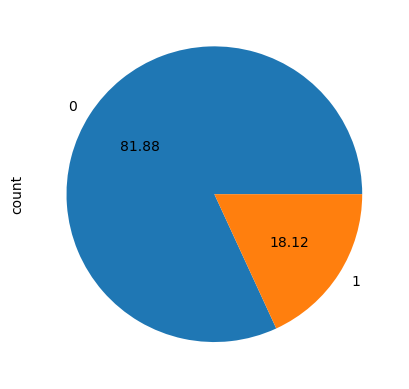

In [5]:
display(churn_data["Churn"].value_counts().plot.pie(autopct="%.2f"))
display(churn_data["Churn"].value_counts())

In [6]:
44182/(199605+44182)

0.18123197709475894

In [7]:
# Dropped CustomerID and encoded objects to boolean
categorical_features = churn_data.select_dtypes(include = ['object']).columns
churn_data_encoded = churn_data.drop(columns=["CustomerID"])
churn_data_encoded = pd.get_dummies(churn_data_encoded, columns=categorical_features.drop('CustomerID'), drop_first=True)
churn_data_encoded.head()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn,...,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Male,ParentalControl_Yes,SubtitlesEnabled_Yes
0,20,11.055215,221.104302,36.758104,63.531377,10,2.176498,4,3,0,...,True,False,False,False,False,False,True,True,False,False
1,57,5.175208,294.986882,32.450568,25.725595,18,3.478632,8,23,0,...,False,False,True,False,False,False,False,True,False,True
2,73,12.106657,883.785952,7.395160,57.364061,23,4.238824,6,1,0,...,False,False,False,False,False,True,False,True,True,True
3,32,7.263743,232.439774,27.960389,131.537507,30,4.276013,2,24,0,...,False,False,True,False,True,False,False,True,True,True
4,57,16.953078,966.325422,20.083397,45.356653,20,3.616170,4,0,0,...,False,True,False,True,False,False,False,False,False,False


In [8]:
# Check data types again
churn_data_encoded.dtypes

AccountAge                          int64
MonthlyCharges                    float64
TotalCharges                      float64
ViewingHoursPerWeek               float64
AverageViewingDuration            float64
ContentDownloadsPerMonth            int64
UserRating                        float64
SupportTicketsPerMonth              int64
WatchlistSize                       int64
Churn                               int64
SubscriptionType_Premium             bool
SubscriptionType_Standard            bool
PaymentMethod_Credit card            bool
PaymentMethod_Electronic check       bool
PaymentMethod_Mailed check           bool
PaperlessBilling_Yes                 bool
ContentType_Movies                   bool
ContentType_TV Shows                 bool
MultiDeviceAccess_Yes                bool
DeviceRegistered_Mobile              bool
DeviceRegistered_TV                  bool
DeviceRegistered_Tablet              bool
GenrePreference_Comedy               bool
GenrePreference_Drama             

In [9]:
# Scale numerical columns
numerical_features = churn_data.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = numerical_features.drop("Churn")

scaler = StandardScaler()
churn_data_encoded[numerical_columns] = scaler.fit_transform(churn_data_encoded[numerical_columns])
churn_data_encoded

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn,...,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Male,ParentalControl_Yes,SubtitlesEnabled_Yes
0,-1.169131,-0.331703,-1.012550,1.445777,-0.568906,-1.005712,-0.715179,-0.175519,-1.253786,0,...,True,False,False,False,False,False,True,True,False,False
1,-0.089945,-1.690423,-0.871303,1.062671,-1.317459,-0.450971,0.411960,1.216976,1.526687,0,...,False,False,True,False,False,False,False,True,False,True
2,0.376731,-0.088741,0.254353,-1.165718,-0.691019,-0.104258,1.069988,0.520728,-1.531833,0,...,False,False,False,False,False,True,False,True,True,True
3,-0.819125,-1.207816,-0.990879,0.663322,0.777613,0.381141,1.102179,-0.871766,1.665711,0,...,False,False,True,False,True,False,False,True,True,True
4,-0.089945,1.031143,0.412150,-0.037246,-0.928765,-0.312285,0.531014,-0.175519,-1.670857,0,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,0.493400,-0.658746,-0.016190,-0.622520,-0.235555,1.559965,0.601371,-1.219890,-0.558668,0,...,False,False,False,False,False,False,True,True,True,False
243783,1.660088,0.129070,1.483585,0.396764,-0.642422,0.727854,-1.344265,-0.175519,1.109616,0,...,False,True,False,True,False,False,False,True,False,False
243784,1.543419,0.467666,1.700349,-0.878129,1.661653,1.351938,0.873836,0.520728,0.136451,0,...,False,True,False,False,False,False,False,True,True,True
243785,-1.548305,1.305539,-1.192488,0.886236,1.210218,0.797197,-0.750417,0.868852,-0.975739,0,...,False,True,False,False,False,True,False,False,False,True


In [10]:
# Split training and test sets (X, y)
X = churn_data_encoded.drop(columns=["Churn"])
y = churn_data_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182840, 28), (60947, 28), (182840,), (60947,))

In [12]:
# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Train the Random Forest model
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.8237156874005284


In [14]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
classification_report_rf = classification_report(y_test, y_pred)

In [15]:
print(classification_report_rf)

              precision    recall  f1-score   support

           0       0.83      0.99      0.90     49978
           1       0.56      0.08      0.13     10969

    accuracy                           0.82     60947
   macro avg       0.69      0.53      0.52     60947
weighted avg       0.78      0.82      0.76     60947



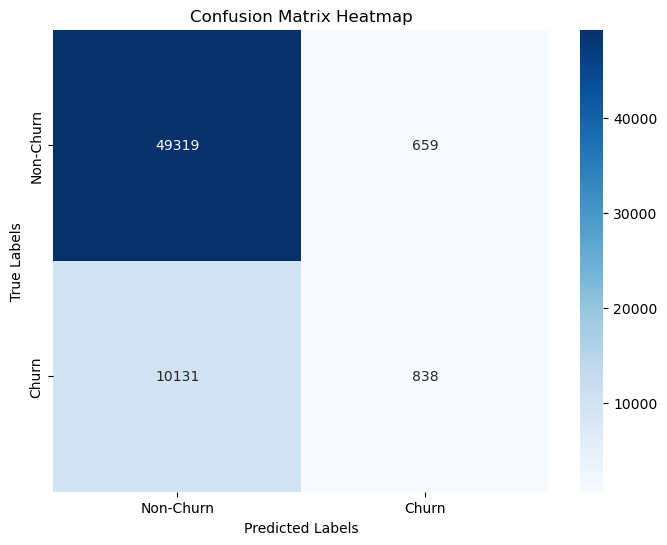

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Assuming you have predictions and true labels for the test set
# y_test: Actual labels
# y_pred: Predicted labels
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [17]:
# Get the feature importance array
feature_importances = clf.feature_importances_

# List the top 10 most important features
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
importances_sorted[:10]

[(0.1103299939285986, 'AverageViewingDuration'),
 (0.10489020536876277, 'ViewingHoursPerWeek'),
 (0.0977395523958734, 'MonthlyCharges'),
 (0.09559695080696301, 'TotalCharges'),
 (0.09481778141686463, 'AccountAge'),
 (0.08648029092985329, 'UserRating'),
 (0.08273522472254335, 'ContentDownloadsPerMonth'),
 (0.06267705282533409, 'WatchlistSize'),
 (0.04727786997251159, 'SupportTicketsPerMonth'),
 (0.01393618618088923, 'MultiDeviceAccess_Yes')]

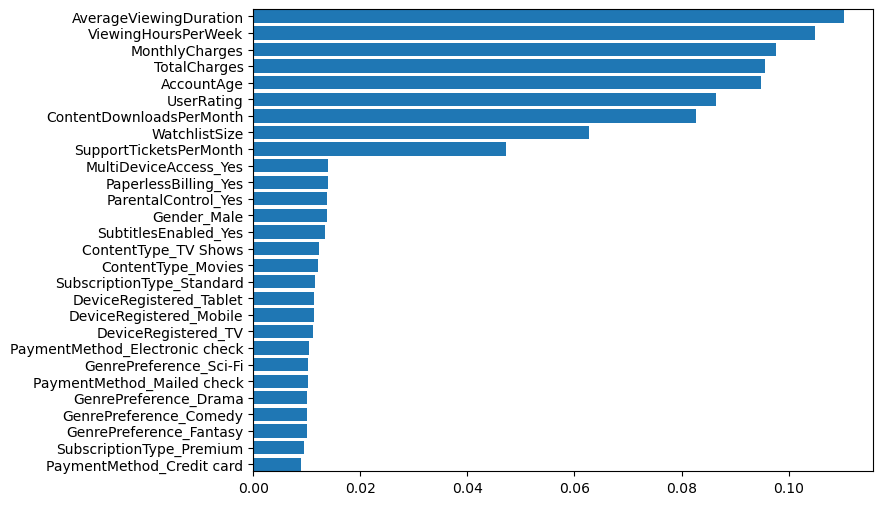

In [18]:
# Plot the feature importances
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(8,6)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [19]:
"""NOT DIRECT COEFFICIENT, BUT MERELY THE LEVEL OF IMPORTANCE OF COLUMN'S CORELATION TO OUTCOME"""

"NOT DIRECT COEFFICIENT, BUT MERELY THE LEVEL OF IMPORTANCE OF COLUMN'S CORELATION TO OUTCOME"

In [20]:
churn_data.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'CustomerID', 'Churn'],
      dtype='object')

In [21]:
# Dropped GenrePreference and PaymentMethod columns
cde = churn_data.drop(columns=["GenrePreference", "PaymentMethod", "DeviceRegistered", "SubscriptionType"])

In [22]:
cde.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'PaperlessBilling',
       'ContentType', 'MultiDeviceAccess', 'ViewingHoursPerWeek',
       'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'CustomerID', 'Churn'],
      dtype='object')

In [23]:
cde.dtypes

AccountAge                    int64
MonthlyCharges              float64
TotalCharges                float64
PaperlessBilling             object
ContentType                  object
MultiDeviceAccess            object
ViewingHoursPerWeek         float64
AverageViewingDuration      float64
ContentDownloadsPerMonth      int64
UserRating                  float64
SupportTicketsPerMonth        int64
Gender                       object
WatchlistSize                 int64
ParentalControl              object
SubtitlesEnabled             object
CustomerID                   object
Churn                         int64
dtype: object

In [24]:
# Dropped CustomerID and encoded objects to boolean
categorical_features = cde.select_dtypes(include = ['object']).columns
cde = cde.drop(columns=["CustomerID"])
cde = pd.get_dummies(cde, columns=categorical_features.drop('CustomerID'), drop_first=True)
cde.head()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn,PaperlessBilling_Yes,ContentType_Movies,ContentType_TV Shows,MultiDeviceAccess_Yes,Gender_Male,ParentalControl_Yes,SubtitlesEnabled_Yes
0,20,11.055215,221.104302,36.758104,63.531377,10,2.176498,4,3,0,False,False,False,False,True,False,False
1,57,5.175208,294.986882,32.450568,25.725595,18,3.478632,8,23,0,True,True,False,False,True,False,True
2,73,12.106657,883.785952,7.395160,57.364061,23,4.238824,6,1,0,True,True,False,False,True,True,True
3,32,7.263743,232.439774,27.960389,131.537507,30,4.276013,2,24,0,False,False,True,False,True,True,True
4,57,16.953078,966.325422,20.083397,45.356653,20,3.616170,4,0,0,True,False,True,False,False,False,False


In [25]:
# Split training and test sets (X, y)
X = cde.drop(columns=["Churn"])
y = cde['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182840, 16), (60947, 16), (182840,), (60947,))

In [26]:
# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest model
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.8231742333502879


In [27]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
classification_report_rf = classification_report(y_test, y_pred)

print(classification_report_rf)

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     49978
           1       0.54      0.10      0.17     10969

    accuracy                           0.82     60947
   macro avg       0.68      0.54      0.53     60947
weighted avg       0.78      0.82      0.77     60947



In [28]:
pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [31]:
from imblearn.under_sampling import RandomUnderSampler

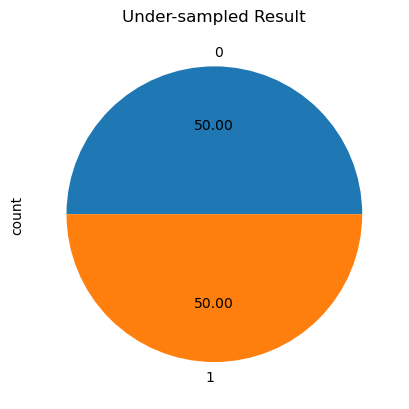

In [37]:

rus = RandomUnderSampler(sampling_strategy=1) #float
# rus = RandomUnderSampler(sampling_strategy="not minority") #string
X_train, y_train = rus.fit_resample(X, y)

ax = y_train.value_counts().plot.pie(autopct="%.2f")
_ = ax.set_title("Under-sampled Result")


In [38]:
# Scale the data
# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# Train the Random Forest model
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
# Evaluate the model
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')


# Initiate Report
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test)
classification_report_rf = classification_report(y_test, y_pred)
# Print Report
print(classification_report_rf)

Training Score: 0.8688153546693224
Testing Score: 0.7830738182355161
              precision    recall  f1-score   support

           0       1.00      0.74      0.85     49978
           1       0.46      1.00      0.63     10969

    accuracy                           0.79     60947
   macro avg       0.73      0.87      0.74     60947
weighted avg       0.90      0.79      0.81     60947



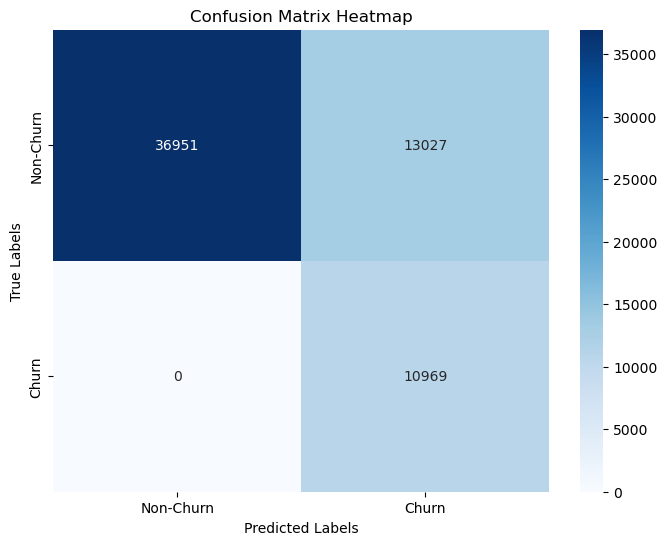

In [39]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()